# COMP 4030/6030 Assignment 8
### Due Sunday 11/22/2020 11:59PM.   No extention

This assignment is a bonus.  You'll be graded based on effort.

Solution will be posted on Monday 9AM.

### Name:  




**Problem 1**

In the previous assignment, the *limited* knapsack problem is defined as in which we are supposed to find the maximum value of a knapsack with a given *capacity* and items with *weights* and *values*.

The requirements are (1) the total weight of selected items is less than the capacity and (2) each item is taken only once.

Use the backtracking technique to solve this problem.

In [141]:
global b_sum
def backtracking(capacity, value_weight_pairs):
    def get_set(boolean_list):
        output = set()  
        for i in range(len(boolean_list)):
            (a,b) = value_weight_pairs[i]
            if boolean_list[i]==True:
             
                output.add((a,b))

        return output

    def sum_set(a_solution):
        items = list(get_set(a_solution))
        a_sum = 0
        for i in range(len(items)):
            (a,b) = items[i]
            a_sum += a
        return a_sum

    def weight_set(a_solution):
        items = list(get_set(a_solution))
        weight = 0
        for i in range(len(items)):
            (a,b) = items[i]
            weight += b
        return weight

    def generate_sets_at_level(solution,i):
        if i == len(value_weight_pairs):   # once we pass the last level, we have a complete solution
             if weight_set(solution) <= capacity:
                    b_sum.append(sum_set(solution))
        else:
            # because a set is a boolean list, at each level there're 2 possibilities.
            for possibility in [True, False]:
                solution[i] = possibility
                generate_sets_at_level(solution, i+1)

    b_sum = []
    solution = [None]* len(value_weight_pairs)
    generate_sets_at_level(solution,0)
    return max(b_sum)  

In [143]:
backtracking(20,[(5,5),(7,8),(19,11)])

26

**Problem 2**

Use backtracking to generate all groups of 4 people in a network who know each other.

In [1]:
import networkx as nx
from matplotlib import pyplot
import random

def randomly_colored_graph(n, pair_prob=0.5, color_prob=0.25):
    G = nx.Graph()
    for i in range(n):
        if random.random() < color_prob:
            G.add_node(i, color='red')
        else:
            G.add_node(i, color='white')
    for i in range(n):
        for j in range(i+1,n):
            if random.random() < pair_prob:
                G.add_edge(i,j)
    return G

def draw_graph(G):
    nx.draw(
        G, 
        with_labels=True, 
        node_color=[ G.nodes[i]['color'] for i in G.nodes ],
    )

0 white
1 white
2 white
3 white
4 white
5 white
6 white
7 white
8 white
9 white
10 white
11 white
12 white
13 red
14 red
15 white
16 white
17 white
18 red
19 white


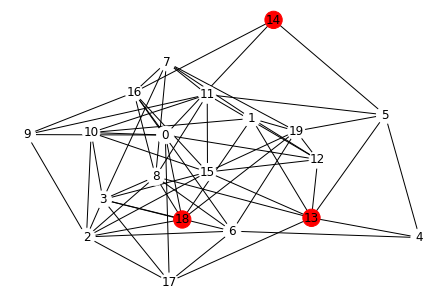

In [18]:
# Example:
G = randomly_colored_graph(20, pair_prob=0.3, color_prob=0.2)
draw_graph(G)
for i in G.nodes:
    print(i, G.nodes[i]['color'])

In [32]:
def group_4people(g):             
    def is_connected(solution):
        nodes = list(get_set(solution))
        if len(nodes) > 4:
            return False
#         if len(nodes) == 1:
#             return False
        elif len(nodes) < 4:
            return False
        else:
            a_list = []
            for i in range(len(nodes)-1):
                for j in range(i+1, len(nodes)):
                    a = (nodes[i],nodes[j])
                    a_list.append(a)
            for i in range(len(a_list)):
                if a_list[i] not in G.edges:
                    return False
            return True
        
    def get_set(boolean_list):
        output = set()
        for i in range(len(boolean_list)):
            if boolean_list[i]==True:
                output.add(i)
        return output

    def cover_at_level(solution,i):
        if i < len(g.nodes):
            for possibility in [True, False]:
                solution[i] = possibility
                cover_at_level(solution,i+1)
        else:
            if is_connected(solution):
                nodes = get_set(solution)
                print(nodes)
                
    solution = len(g.nodes) * [None]
    cover_at_level(solution,0)

In [33]:
group_4people(G)

{8, 2, 3, 6}
{17, 2, 3, 6}
{8, 18, 2, 3}
{10, 2, 3, 15}


**Problem 3**

Given of list of n numbers, L, we want to find the maximum sum of a sublist in L.  For example, if L = [20, -10, 5, 10, -6, 50, -20, 5] , the max sum is 69, which comes from the sublist [20, -10, 5, 10, -6, 50]

We discussed this problem in notebook #15.

Using a simple solution with nested for loops, this problem can be solved in $\Theta(n^3)$ steps.

A more clever solution with nested loops gives a $\Theta(n^2)$ solution.

A recursive solution that divides the list in half and recursively computes the max sum in each half gives a $\Theta(n \log n)$ solution.

Using dynamic programming, we can achieve a $\Theta(n)$ solution.

Solve the following dynamic programming problem for finding the max sum of a sublist in L[0:i] that ends at index i.

For example:
* max_sum_i([20, -10, 5, 10, -6, 50, -20, 5], 0) is 20.  The sublist is [20].

* max_sum_i([20, -10, 5, 10, -6, 50, -20, 5], 1) is 10.  The sublist is [20, -10].

* max_sum_i([20, -10, 5, 10, -6, 50, -20, 5], 2) is 5.  The sublist is [5].

* max_sum_i([20, -10, 5, 10, -6, 50, -20, 5], 3) is 15.  The sublist is [5,10].

* max_sum_i([20, -10, 5, 10, -6, 50, -20, 5], 4) is 19.  The sublist is [20, -10, 5, 10, -6].

* max_sum_i([20, -10, 5, 10, -6, 50, -20, 5], 5) is 69.  The sublist is [20, -10, 5, 10, -6, 50].

* max_sum_i([20, -10, 5, 10, -6, 50, -20, 5], 6) is 49.  The sublist is [20, -10, 5, 10, -6, 50, -20].

* max_sum_i([20, -10, 5, 10, -6, 50, -20, 5], 7) is 69.  The sublist is [20, -10, 5, 10, -6, 50, -20, 5].


To solve this problem using dynamic programming, you'll have to consider two possibilities for the sublist that ends at index i:

1. The sublist includes previous items.
2. The sublist does not include previous items.


In [47]:
# return the max sum of a sublist in L[0:i]
def max_sum(L):
    output = []
    def max_sum_i(L, i):
        if i == 0:
            return L[0]
        current_sum = L[i]
        next_sum = L[i] + max_sum_i(L, i-1)
        max_sum = max(current_sum,next_sum)
        output.append(max_sum)
        return max_sum
    max_sum_i(L,len(L)-1)
    return max(output)

In [48]:
max_sum([20, -10, 5, 10, -6, 50, -20, 5])

69